# A short guide on Vector Auto Regressions using Google Trends

In [16]:
import numpy as np
from statsmodels.tsa.vector_ar import var_model
%matplotlib inline
import csv
import pandas as pd
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

For more documentation on vector autoregressions, and how they're implemented in statsmodel, can be found here:

http://www.statsmodels.org/dev/vector_ar.html

We're going to create a Vector Autoregression Model for the top 10 largest energy firms in the world. Specifically, we're going to look at their daily Google search index. The point of this is to see if one particular firm, or group of firms, leads or lags other firms in terms of search interest. The top 10 largest energy firms are (according to [Wikipedia](https://en.wikipedia.org/wiki/List_of_largest_energy_companies):

I filtered this list based on the results that showed up in Related Topics. Specifically, I looked for whether the company name was in the top results or if Stock - Topic was in the top results.

* XOM
* CVX
* BP
* SLB
* EPD
* ENI

In [37]:
#Load in the Google trends csv file and clean up the pandas dataframe
top_energy_firms = pd.read_csv("energy_firms.csv")
top_energy_firms.index = top_energy_firms['Date']
del top_energy_firms['Date']
del top_energy_firms.index.name
top_energy_firms.index = dates_from_str(top_energy_firms.index)

In [38]:
#Create a Vector Auto Regression model from the data
model = VAR(top_energy_firms)

**Note**

The VAR class assumes that the passed time series are stationary. Non-stationary or trending data can often be transformed to be stationary by first-differencing or some other method. For direct analysis of non-stationary time series, a standard stable VAR(p) model is not appropriate. 

In [68]:
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 13, Jul, 2017
Time:                     17:25:27
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    19.7647
Nobs:                     260.000    HQIC:                   19.4207
Log likelihood:          -4666.18    FPE:                2.15733e+08
AIC:                      19.1895    Det(Omega_mle):     1.83945e+08
--------------------------------------------------------------------
Results for equation XOM
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          1.975708         4.827229            0.409           0.683
L1.XOM         0.843404         0.040961           20.591           0.000
L1.CVX         0.037351         0.041539            0.899           0.369
L1.BP          0

# General Derivation of a VAR model

Please see [these](http://economia.unipv.it/pagp/pagine_personali/erossi/rossi_VAR_Ecnmtra_Fin_2010.pdf) slides for a more in-depth discussion of VAR models.

In general, the VAR model is defined as:

$y_{t} = c + \Phi_{1}y_{t-1} + \cdots + \Phi_{p}y_{t-p} + \epsilon_{t}$

Note that $y_{t}$ is a **vector**. More specifically, in our example it is the following vector:

$y_{t} = [XOM_{t} \, CVX_{t} \, BP_{t} \, SLB_{t} \, EPD_{t} \, ENI_{t}]'$

Note that $y_{t}$ is a $6 x 1$ vector. Further, our ticker symbols represent the search index for each ticker at date t. The $\Phi$'s in the VAR equation are $6 x 6$ vectors of coefficients. We have one for each of our lags p. Finally, $\epsilon_{t}$ is a $6 x 1$ vector of residuals.

In order to use the VAR model we need the following assumptions to hold:

1. $E[\epsilon_{t}] = 0$
2. $E[\epsilon_{t}\epsilon_{\tau}'] = 0 \, \forall \, t \neq \tau$
3. $E[\epsilon_{t}\epsilon_{\tau}'] = \Omega \, \forall \, t = t$ where $\Omega$ is a positive definite matrix
4. Stationarity:
    * $E[y_{t}]$ and $E[y_{t}y_{t-j}']$  are both independent of the date t
    


# Information Criteria
Akaike Information Criterion = AIC = $-2L + 2(k + 2kp)$

Bayesian Information Criterion = BIC = $-2L + (k + 2kp)ln(T)$

Where L is the log-likelihood, k is the number of variables in the system (6), T is the sample size, and p is the lag. Note that in the above, we have the lowest BIC score with a lag set to 1. In general, we select the lag based on the lowest AIC (or BIC) score.

For a thorough description of log likelihood see [here](http://economia.unipv.it/pagp/pagine_personali/erossi/rossi_VAR_Ecnmtra_Fin_2010.pdf)

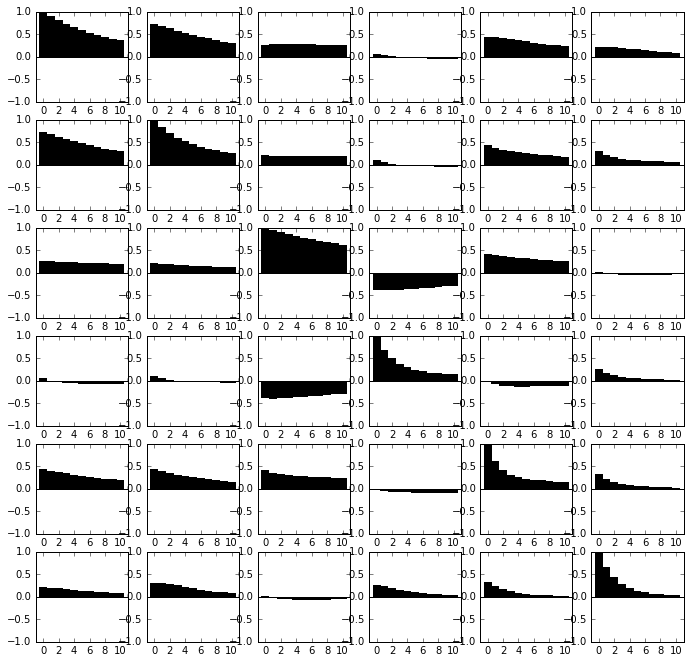

In [54]:
#Plot the auto correlation function for each firm
resublts.plot_acorr()

On the diagonal is the auto-correlation for each of the tickers. For each column, we have the correlation between the lagged observations of each ticker against the ticker represented by that column. The columns are in the order listed above. For example, the graph in the first column and the second row represents the correlation between the current search volume for CVX against one-day lagged observations of the search index for XOM. 

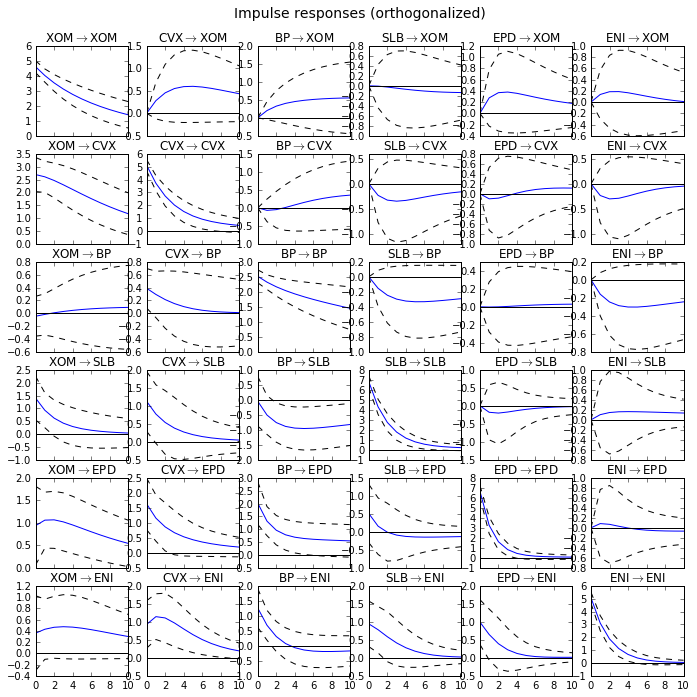

In [58]:
#Graph Impulse Response Functions
irf = results.irf(10)
irf.plot(orth=True)

# Deciphering Impulse Response Functions